### **Disciplina**: Análise das Demonstrações Contábeis

### **Professor**: Kléber Formiga Miranda

***

**Objetivos**: Proporcionar aos discentes ferramentas para analisar os aspectos patrimoniais, financeiros e de desempenho das organizações, os motivos que determinam a evolução apresentada e as tendências futuras, fornecendo informações úteis para tomada de decisão dos diversos agentes econômicos.

Leituras recomendadas:&nbsp;

* [Análise Financeira - Accounting Tools](https://www.accountingtools.com/articles/2017/5/14/financial-statement-analysis)
* [Outro texto](https://investinganswers.com/articles/financial-statement-analysis-beginners)

Links Uteis:&nbsp;

* [Github do professor](https://github.com/kleberformiga)

***
### Aula 1
Objetivo: *Discutir a necessidade da análise das demonstrações contábeis com foco no objetivo de cada usuário.*

### Questões:

1. Para QUE serve a análise das demonstrações contábeis?
2. Para QUEM serve a análise das demonstrações contábeis?
3. Quais informações utilizar? Sempre as mesmas? Apenas contábeis?
4. Os números apresentados pela contabilidade são sensíveis a fatores externos a empresa (inflação, tempo, política, etc)?

[Vamos ver uma notícia](http://www.valor.com.br/empresas/6397595/azul-tem-maior-rentabilidade-no-trimestre)
<br>
[Acessar aqui (pdf)](https://github.com/kleberformiga/Aulas/blob/master/AnaliseDemCont/Documentos/NEWS%20Azul%20tem%20maior%20rentabilidade%20no%20trimestre.pdf)


### Para pensar sobre isso, vamos ver um caso prático com dados obtidos na plataforma Economatica(R).

In [24]:
library(repr)
options(repr.plot.width=10, repr.plot.height=5)

In [25]:
# Baixando o arquivo BDAula1.rds para exemplos
options(scipen=999) # Opção para não  mostrar número em formato centífico (ex.: 9.28140e-01) 
options(warn=0)  # retira os avisos
BD.Aula1 <- readRDS("Dados/BDAula1.rds") # Atribuido o nome BD.Aula1 ao banco de dados (objeto)
library(data.table); library(readxl); library(tidyverse) # pacotes para manipulação de dados
str(BD.Aula1) # Verificando a estrutura do banco de dados

Classes 'data.table' and 'data.frame':	711 obs. of  15 variables:
 $ cod         : chr  "ADHM3" "ADHM3" "ADHM3" "AELP3" ...
 $ id          : chr  "2172" "2172" "2172" "1931" ...
 $ ano         : chr  "2015" "2016" "2017" "2015" ...
 $ econo_bov   : Factor w/ 10 levels "Bens industriais",..: 3 3 3 10 10 10 4 4 4 4 ...
 $ AtvTotal    : num  6681 2750 2409 13872026 50040 ...
 $ AtvCirc     : num  570 957 357 4609746 28108 ...
 $ PasCirc     : num  34931 3278 7931 4508669 11979 ...
 $ PatLiq      : num  -35587 -4232 -9328 1459965 16216 ...
 $ CxOper      : num  -26 -32802 -180 -316155 1702442 ...
 $ RecLiq      : num  0 0 18 13667413 0 ...
 $ VrMerc      : num  9763 23898 15428 538045 1236744 ...
 $ LAIR        : num  -12533 -5448 -5411 112769 535 ...
 $ LucroLiquido: num  -14799 -1817 -5411 -15532 226577 ...
 $ LucroBruto  : num  0 0 18 471607 -1278 ...
 $ LiqBolsa    : num  0.00434 0.00869 0.00273 0.00028 0.00022 0.00008 0 0.00001 0 0.00007 ...
 - attr(*, ".internal.selfref")=<externalpt

In [26]:
BD.Aula1$id <- as.numeric(BD.Aula1$id) # transformando o id da empresa para formato numérico
BD.Aula1$ano <- as.numeric(BD.Aula1$ano) # transformando o ano para formato numérico
setnames(BD.Aula1, "econo_bov", "setor") # trocando o nome da variavel econo_bov para setor (mais sugestivo)
str(BD.Aula1) # verificando se a estrutura dessas duas variáveis foram alteradas

Classes 'data.table' and 'data.frame':	711 obs. of  15 variables:
 $ cod         : chr  "ADHM3" "ADHM3" "ADHM3" "AELP3" ...
 $ id          : num  2172 2172 2172 1931 1931 ...
 $ ano         : num  2015 2016 2017 2015 2016 ...
 $ setor       : Factor w/ 10 levels "Bens industriais",..: 3 3 3 10 10 10 4 4 4 4 ...
 $ AtvTotal    : num  6681 2750 2409 13872026 50040 ...
 $ AtvCirc     : num  570 957 357 4609746 28108 ...
 $ PasCirc     : num  34931 3278 7931 4508669 11979 ...
 $ PatLiq      : num  -35587 -4232 -9328 1459965 16216 ...
 $ CxOper      : num  -26 -32802 -180 -316155 1702442 ...
 $ RecLiq      : num  0 0 18 13667413 0 ...
 $ VrMerc      : num  9763 23898 15428 538045 1236744 ...
 $ LAIR        : num  -12533 -5448 -5411 112769 535 ...
 $ LucroLiquido: num  -14799 -1817 -5411 -15532 226577 ...
 $ LucroBruto  : num  0 0 18 471607 -1278 ...
 $ LiqBolsa    : num  0.00434 0.00869 0.00273 0.00028 0.00022 0.00008 0 0.00001 0 0.00007 ...
 - attr(*, ".internal.selfref")=<externalptr> 


### Questões

1. O que podemos observar nesse banco de dados?
2. É possível fazer alguma análise?


In [27]:
head(BD.Aula1, 30) # observando as 30 primeiras observações do banco de dados (BD.Aula1)

cod,id,ano,setor,AtvTotal,AtvCirc,PasCirc,PatLiq,CxOper,RecLiq,VrMerc,LAIR,LucroLiquido,LucroBruto,LiqBolsa
ADHM3,2172,2015,Consumo não cíclico,6681,570,34931,-35587,-26,0,9763,-12533,-14799,0,0.00434
ADHM3,2172,2016,Consumo não cíclico,2750,957,3278,-4232,-32802,0,23898,-5448,-1817,0,0.00869
ADHM3,2172,2017,Consumo não cíclico,2409,357,7931,-9328,-180,18,15428,-5411,-5411,18,0.00273
AELP3,1931,2015,Utilidade pública,13872026,4609746,4508669,1459965,-316155,13667413,538045,112769,-15532,471607,0.00028
AELP3,1931,2016,Utilidade pública,50040,28108,11979,16216,1702442,0,1236744,535,226577,-1278,0.00022
AELP3,1931,2017,Utilidade pública,34273,11157,12008,-759,0,0,470674,181,130,-765,0.00008
BRGE6,470,2015,Financeiro e outros,3034511,1720799,1155473,999692,126222,27701,336882,118269,64225,-71286,0.00000
BRGE6,470,2016,Financeiro e outros,3247532,1855664,1282724,1044205,123703,30556,212774,122897,61175,-58695,0.00001
BRGE6,470,2017,Financeiro e outros,3141175,1880712,1293229,1090754,136395,25294,248995,108806,51187,-65916,0.00000
RPAD5,995,2015,Financeiro e outros,857499,9396,5830,851427,-2423,189,209630,51585,51537,162,0.00007


### Vamos ver informações setoriais para tentar outros insights

In [28]:
setorial <- BD.Aula1[, .(qdeEmpresas = .N, AtivoMedio = mean(AtvTotal)), by = .(setor, ano)][order(AtivoMedio, decreasing = T)] # Esse banco de dados possui 3 observações por empresa
setorial

setor,ano,qdeEmpresas,AtivoMedio
"Petróleo, gás e biocombustíveis",2015,7,133594615
"Petróleo, gás e biocombustíveis",2017,7,124059312
"Petróleo, gás e biocombustíveis",2016,7,119531565
Telecomunicações,2015,4,59164513
Telecomunicações,2016,4,55488266
Telecomunicações,2017,4,51437939
Materiais básicos,2015,23,32522038
Materiais básicos,2017,23,30119553
Materiais básicos,2016,23,29871080
Consumo não cíclico,2015,22,21418085


### Vamos ver informações de apenas um setor

In [29]:
BD.Aula1[grep("Saú", setor)] # Escolhido o setor que contem o padrão informado entre aspas

cod,id,ano,setor,AtvTotal,AtvCirc,PasCirc,PatLiq,CxOper,RecLiq,VrMerc,LAIR,LucroLiquido,LucroBruto,LiqBolsa
BALM4,156,2015,Saúde,161822,108270,42945,86166,4694,112044,87808,21246,14111,67957,0.00004
BALM4,156,2016,Saúde,170692,95050,42355,87628,766,113105,79576,5428,3016,70046,0.00004
BALM4,156,2017,Saúde,180845,104603,54390,88569,5534,109753,86240,2451,675,63469,0.00003
BIOM3,1930,2015,Saúde,229673,130406,13862,115128,-13899,0,172631,15620,8282,0,0.00064
BIOM3,1930,2016,Saúde,237385,51491,19723,65929,-38281,0,198834,-50020,-45608,0,0.00029
BIOM3,1930,2017,Saúde,262387,64367,43317,59301,-54405,103,335436,-41032,-38128,36,0.00071
BPHA3,2250,2015,Saúde,2333307,817919,1703057,544362,39378,3387469,35942,-701171,-654545,918389,0.03551
BPHA3,2250,2016,Saúde,1458384,219497,1031504,304336,25249,1502656,506603,-638752,-634341,461469,0.02689
BPHA3,2250,2017,Saúde,144941,56273,1375821,-1317339,-330065,516786,411615,-1581172,-1621675,159151,0.01407
CREM3,2014,2015,Saúde,828153,478956,347513,173971,13836,874403,525484,21333,25219,257311,0.00007


### Como facilitar a visualização do panorama da empresa?

#### Vamos discutir sobre índices, gráficos e comparações intra/inter empresas/mercado

A utilização de índices é importante, pois mitiga o efeito dos números absolutos. Por exemplo, a PETROBRAS possui mais ativos que a ALUPAR. Na mesma linha, é de se esperar que o valor absoluto do lucro da Petrobras seja superior ao da ALUPAR. Contudo, será que a relação entre o lucro gerado pelos ativos da PETROBRAS é superior ao lucro gerado pelos ativos da ALUPAR?

## Vamos ver graficamente

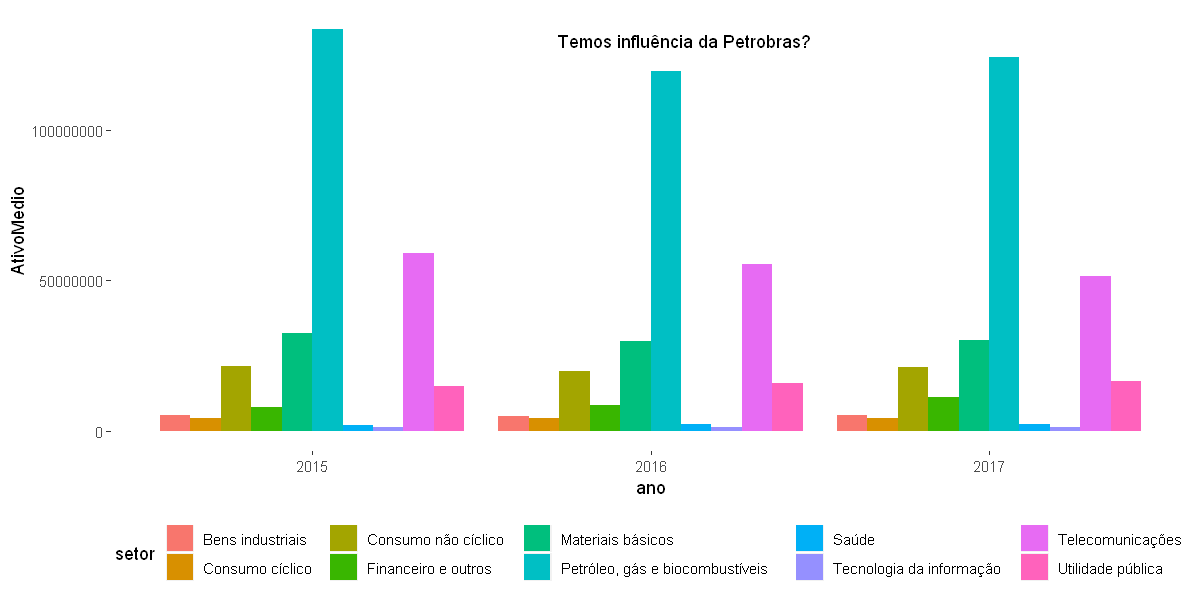

In [16]:
ggplot(setorial, aes(x = ano, y = AtivoMedio)) +
geom_bar(stat = "identity", aes(fill = setor), position = "dodge") +
theme(legend.position = "bottom", panel.background = element_blank()) +
annotate("text", x = 2016.1, y = 130000000, label = "Temos influência da Petrobras?")

In [17]:
setorial2 <- BD.Aula1[cod != "PETR4", .(qdeOBS = .N, qdeEmpresas = .N/3, AtivoMedio = mean(AtvTotal)), by = .(setor, ano)][order(AtivoMedio, decreasing = T)] # O codigo da petrobras no banco de dados é PETR4

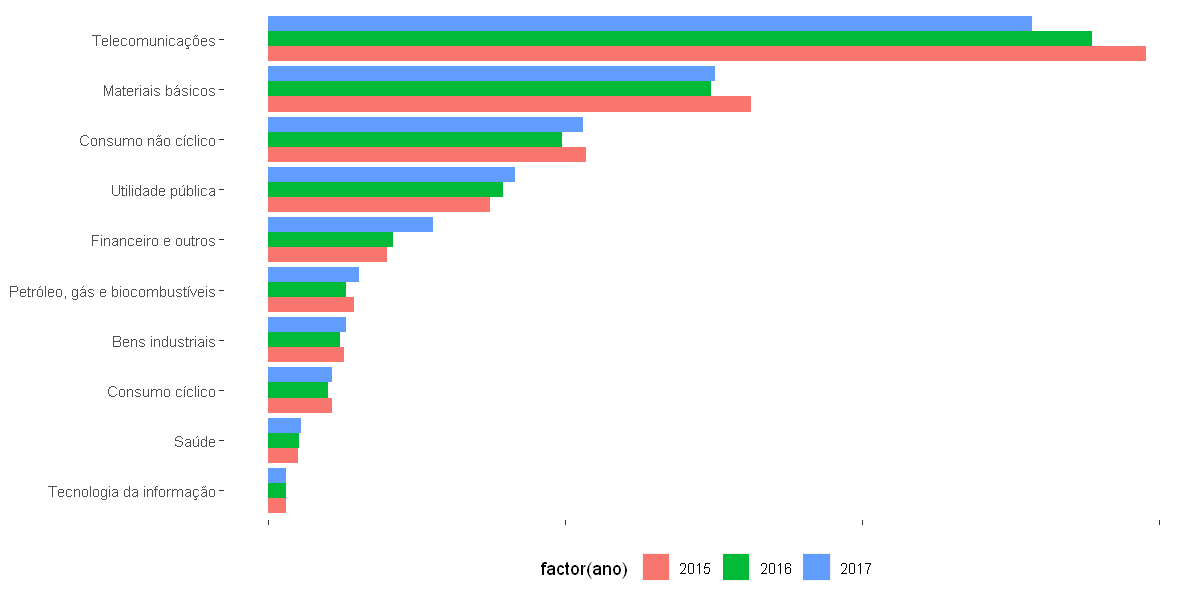

In [18]:
ggplot(setorial2, aes(reorder(setor, AtivoMedio), AtivoMedio, fill = factor(ano))) +
geom_col(position = "dodge") + coord_flip() +
theme(legend.position = "bottom", panel.background = element_blank(), axis.title=element_blank(), axis.text.x=element_blank())



Para usar índices temos:

\begin{align*}
INDICE &= \frac{LUCRO}{ATIVO}
\end{align*}

In [19]:
resultSetor <- BD.Aula1[, .(indice = round(mean(LucroLiquido/AtvTotal), 3)), by = .(setor, ano)]
head(resultSetor)

setor,ano,indice
Consumo não cíclico,2015,-0.118
Consumo não cíclico,2016,-0.016
Consumo não cíclico,2017,-0.090
Utilidade pública,2015,0.029
Utilidade pública,2016,0.156
Utilidade pública,2017,0.028


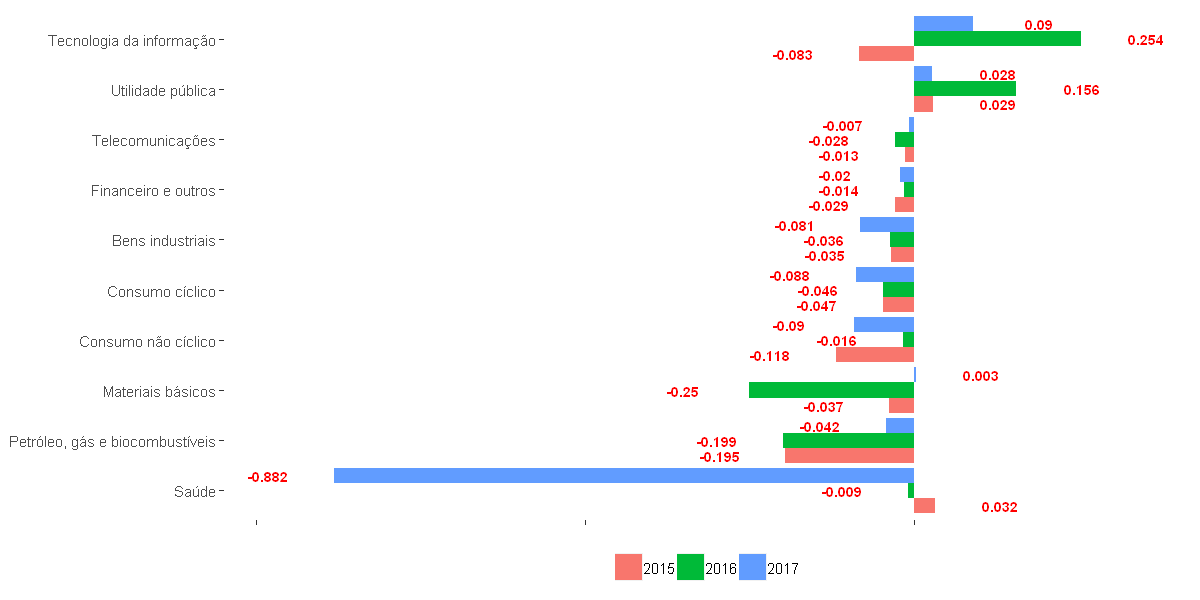

In [20]:
ggplot(resultSetor, aes(reorder(setor, indice), indice, fill = factor(ano))) +
geom_col(position = "dodge") + coord_flip() +
theme(legend.position = "bottom", panel.background = element_blank(), axis.title=element_blank(),
      axis.text.x=element_blank(), legend.title = element_blank()) +
geom_text(aes(y = indice + 0.1 * sign(indice), label = indice), 
              position = position_dodge(width = 0.9), size = 3, color = "red", fontface = "bold")

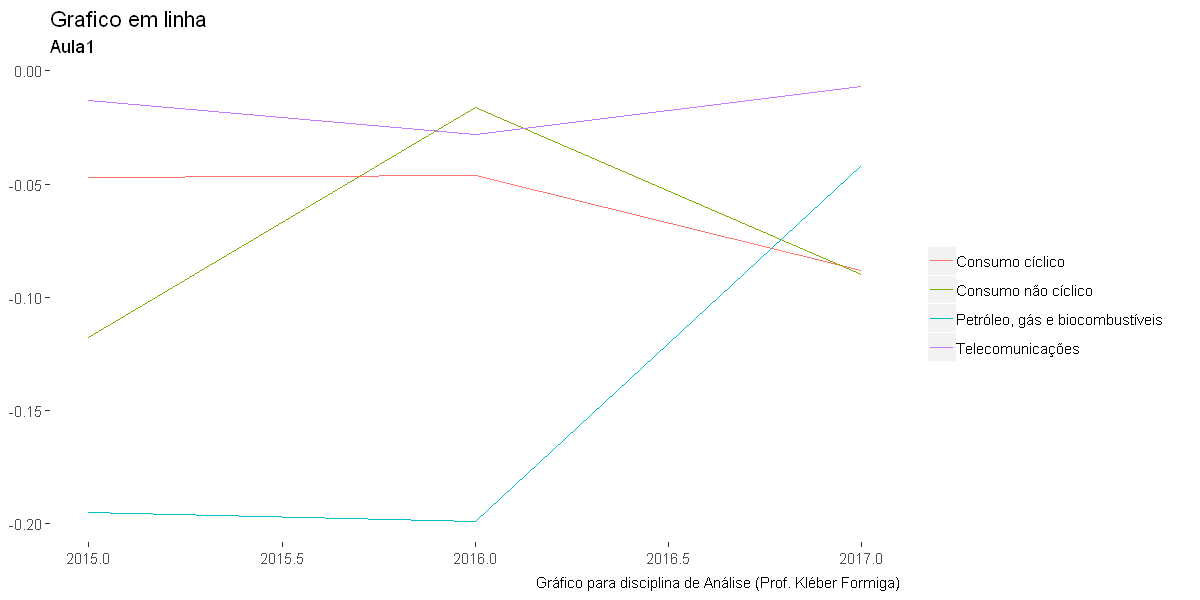

In [22]:
ggplot(resultSetor[substr(setor, 1, 4) %in% c("Petr", "Tele", "Cons")], aes(ano, indice, col = setor)) +
geom_line() +
theme(legend.position = "right", panel.background = element_blank(), axis.title=element_blank(), legend.title = element_blank()) +
labs(title = "Grafico em linha", subtitle = "Aula1", caption = "Gráfico para disciplina de Análise (Prof. Kléber Formiga)")

### Até aqui vimos
* Tabelas
* Gráficos
* Tendências
* Importância do setor
* Noção da necessidade de índices
* Formas de comunicar informações financeiras

<br>
Para a proxima aula, trazer as diferenças entre os setores indicados no gráfico anterior. A intenção é discutir o que pode diferenciar nos números das empresas de um setor em relação às de outro.